In [76]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor  

In [77]:
!pwd

/c/Users/avalencia/Documents/Flatiron/phase_2/project/bsc-phase-two-project/notebooks/exploratory/Alex


In [78]:
# Pull Dataframe
path = '../../../data/kc_house_data.csv'

df = pd.read_csv(path)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [68]:
# Dropped the house with 33 bathrooms
df.drop(15856)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [69]:
# Pulling the descriptive stats for price.
df.describe()['price']

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [71]:
# Looking at home prices lower than the 25% Quartile.
df = df.loc[df['price'] <= 322000]
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21534,880000205,7/29/2014,249000.0,3,2.00,1260,1125,2.0,0.0,0.0,...,7,810,450.0,2011,0.0,98106,47.5262,-122.361,1260,1172
21543,3438501329,5/20/2014,305000.0,2,2.50,1590,2656,2.0,0.0,0.0,...,7,1220,370.0,2009,0.0,98106,47.5489,-122.364,1590,2306
21556,6056111067,7/7/2014,230000.0,3,1.75,1140,1201,2.0,0.0,0.0,...,8,1140,0.0,2014,NaN,98108,47.5637,-122.295,1210,1552
21569,3832050760,8/28/2014,270000.0,3,2.50,1870,5000,2.0,0.0,0.0,...,7,1870,0.0,2009,0.0,98042,47.3339,-122.055,2170,5399


<AxesSubplot:xlabel='price'>

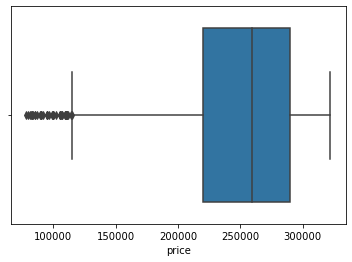

In [72]:
sns.boxplot(x=df['price'])

In [25]:
# Correlate price with variables
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.412439
bathrooms        0.383693
grade            0.380177
sqft_above       0.346770
sqft_living15    0.334986
yr_built         0.271524
floors           0.263898
bedrooms         0.227677
lat              0.169049
long             0.066302
view             0.061269
id               0.027281
waterfront       0.015031
condition        0.012721
sqft_lot        -0.000198
sqft_lot15      -0.000265
yr_renovated    -0.007093
zipcode         -0.036600
Name: price, dtype: float64

In [38]:
df.sqft_living.value_counts()

1010    80
1200    75
1400    64
1300    60
1250    57
        ..
1889     1
1805     1
1785     1
1765     1
2093     1
Name: sqft_living, Length: 388, dtype: int64

<AxesSubplot:xlabel='sqft_living'>

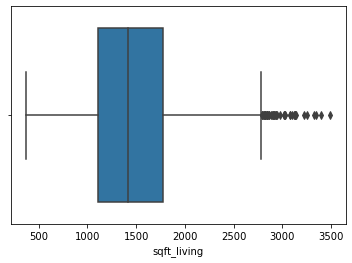

In [26]:
# Boxplot for sqft_living
sns.boxplot(x=df['sqft_living'])

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

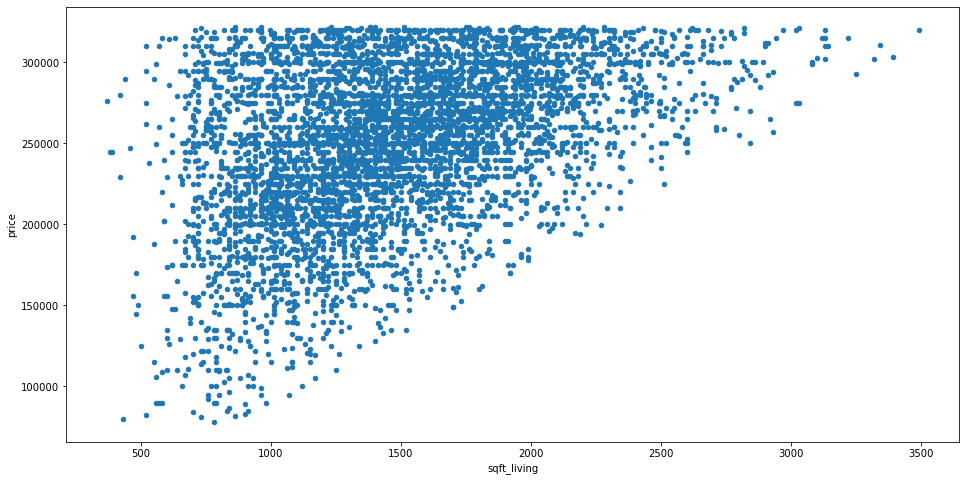

In [27]:
# Scatter plot between price and sqft_living
fig, ax = plt.subplots(figsize=(16,8))
df.plot(kind='scatter', x='sqft_living', y='price', ax=ax)

In [28]:
#imports 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#create X and y 
features = ['sqft_living']
X = df[features]
y = df.price

#instiatiate and fit 
slr = LinearRegression()
slr.fit(X, y)

#print coefficients 
print(slr.intercept_)
print(slr.coef_)

189733.36610376387
[42.30090754]


In [29]:
# Descriptive stats for bathrooms
df.describe()['bathrooms']

count    5406.000000
mean        1.664169
std         0.614905
min         0.500000
25%         1.000000
50%         1.750000
75%         2.250000
max         5.250000
Name: bathrooms, dtype: float64

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

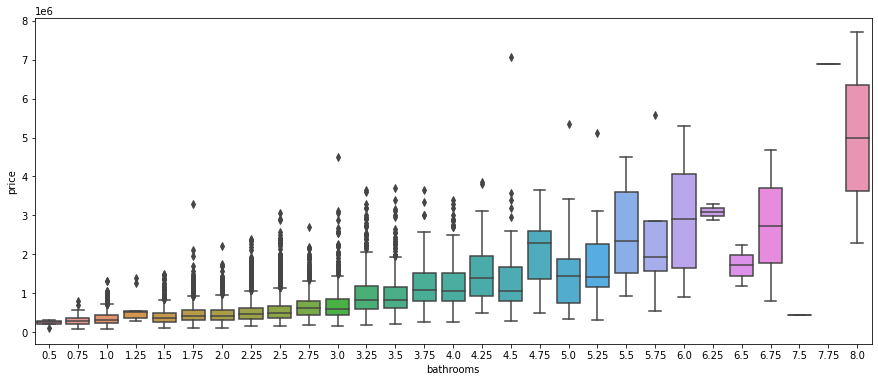

In [86]:
# Boxplot for bathrooms
plt.figure(figsize=(15,6))
sns.boxplot(x=df['bathrooms'], y=df['price'])

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

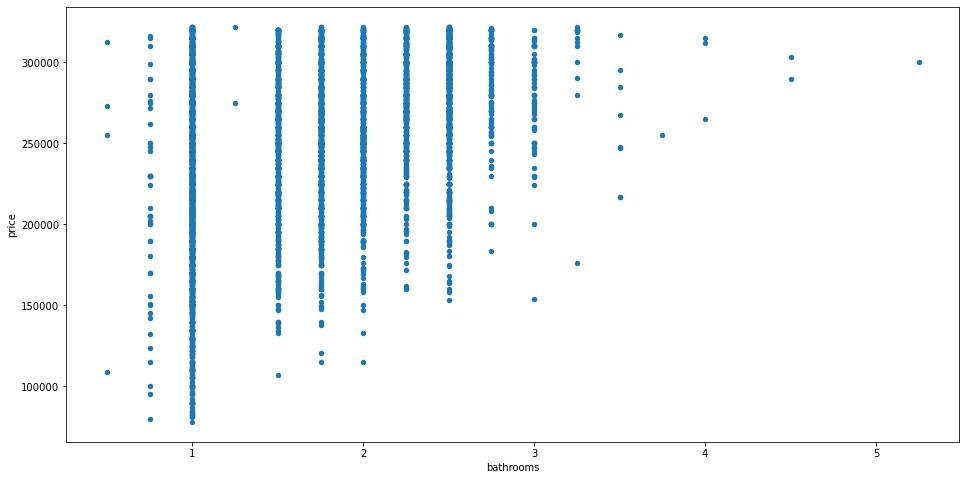

In [31]:
# Scatter plot for bathrooms and price
fig, ax = plt.subplots(figsize=(16,8))
df.plot(kind='scatter', x='bathrooms', y='price', ax=ax)

In [34]:
# Descriptive stats for grade
df.describe()['grade']

count    5406.000000
mean        6.805031
std         0.727230
min         3.000000
25%         6.000000
50%         7.000000
75%         7.000000
max        10.000000
Name: grade, dtype: float64

<AxesSubplot:xlabel='grade'>

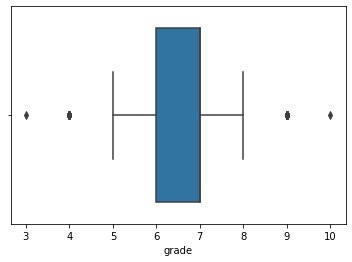

In [35]:
# Boxplot for grade.
sns.boxplot(x=df['grade'])

<AxesSubplot:xlabel='grade', ylabel='price'>

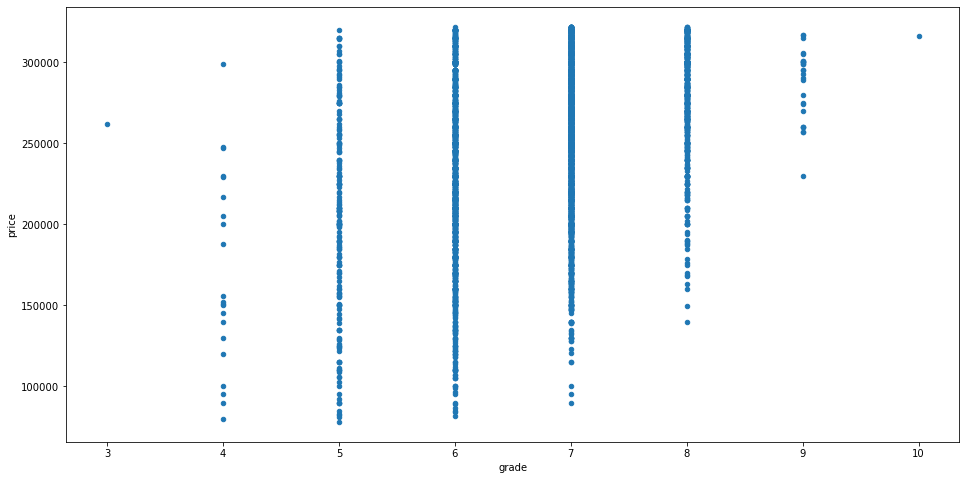

In [36]:
# Scatter plot for grade and price
fig, ax = plt.subplots(figsize=(16,8))
df.plot(kind='scatter', x='grade', y='price', ax=ax)

In [75]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

f = 'price ~ sqft_living + bathrooms + grade'
model = ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     487.2
Date:                Mon, 28 Jun 2021   Prob (F-statistic):          3.25e-280
Time:                        16:37:05   Log-Likelihood:                -65322.
No. Observations:                5406   AIC:                         1.307e+05
Df Residuals:                    5402   BIC:                         1.307e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.159e+05   5738.384     20.191      0.000    1.05e+05    1.27e+05
sqft_living    22.2593      1.778     12.519      0.000      18.774      25.745
bathrooms    1.047e+04   1347.293      7.768      0.000    7824.470    1.31e+04
grade        1.261e+04    991.438     12.724      0.000    1.07e+04    1.46e+04
==============================================================================
Omnibus:                       81.988   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.545
Skew:                          -0.308   Prob(JB):                     2.66e-19
Kurtosis:                       2.972   Cond. No.                     1.54e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""